In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn

In [3]:
df = pd.read_csv("./dataset/competition-data/train.csv")
df_test = pd.read_csv("./dataset/competition-data/test.csv")

# df = df.append(df_test)
df.shape

(442846, 51)

In [4]:
norm_1 = pd.concat([df[df['model_score']>0.5]]*41)

In [5]:
norm_0 = df[df['model_score']<0.5]

In [6]:
# pd.concat([norm_1, norm_0])

In [7]:
# df[:5]

In [8]:
df.keys()

Index(['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'V1', 'V2',
       'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13',
       'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23',
       'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33',
       'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'model_score'],
      dtype='object')

In [9]:
print (">=0.5\t",(df['model_score'].values >= 0.5).sum())
print ("<0.5\t",(df['model_score'].values < 0.5).sum())

>=0.5	 10500
<0.5	 432346


In [10]:
10500/df.shape[0]

0.02371027400044259

In [11]:
def stats_categorical(df, k):
    c = df[k].unique()
    # number of elements, min, max
    print (k, '\t', len(c), "\t", c.min(), "\t", c.max())

In [12]:
df.isna().any()

C1             False
C2             False
C3             False
C4             False
C5             False
C6             False
C7             False
C8             False
C9             False
C10            False
V1              True
V2              True
V3              True
V4             False
V5             False
V6              True
V7              True
V8             False
V9              True
V10            False
V11             True
V12            False
V13             True
V14             True
V15             True
V16             True
V17            False
V18             True
V19             True
V20             True
V21             True
V22             True
V23            False
V24            False
V25             True
V26             True
V27             True
V28             True
V29             True
V30             True
V31             True
V32             True
V33             True
V34             True
V35             True
V36             True
V37             True
V38          

In [13]:
for i in range(10):
    stats_categorical(df, 'C'+str(i+1))

C1 	 501 	 1 	 502
C2 	 264 	 0 	 265
C3 	 60 	 0 	 59
C4 	 61 	 0 	 60
C5 	 107 	 0 	 108
C6 	 11624 	 0 	 11624
C7 	 4 	 0 	 3
C8 	 3 	 0 	 2
C9 	 104 	 0 	 105
C10 	 5 	 0 	 4


In [14]:
a = []
for i in range(10):
    a.append(len(df['C' + str(i+1)].unique()))

In [15]:
a

[501, 264, 60, 61, 107, 11624, 4, 3, 104, 5]

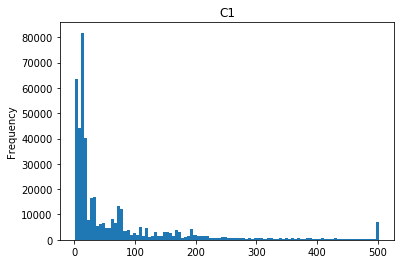

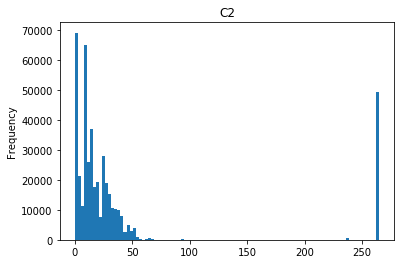

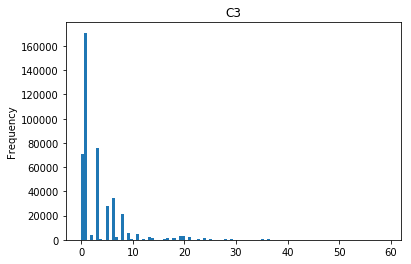

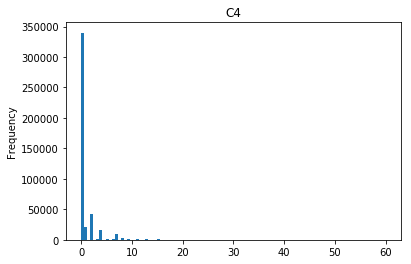

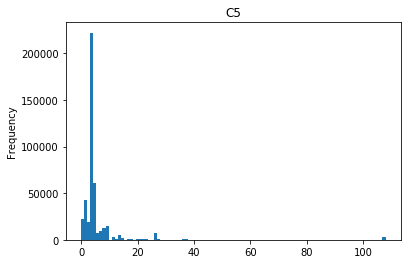

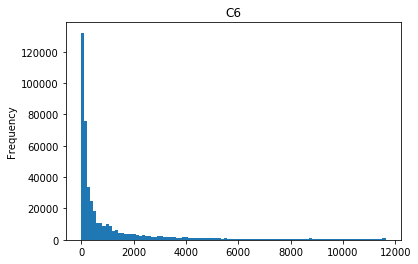

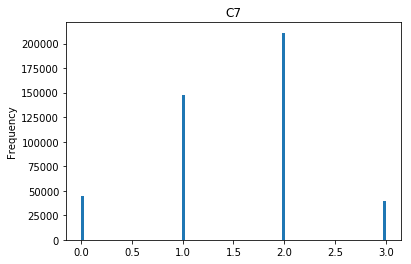

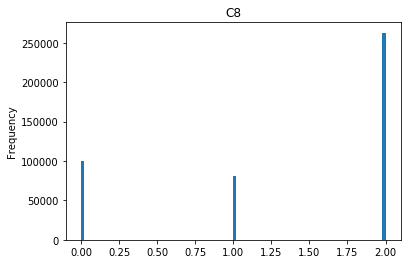

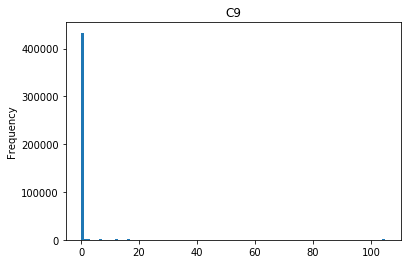

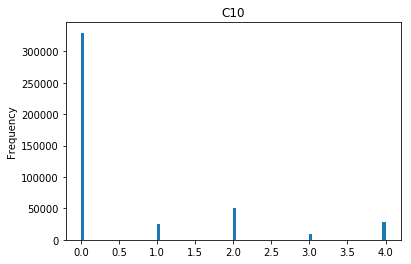

51

In [16]:
def plthist(df, k):
    df[k].plot.hist(bins=100)
    plt.title(k)
    plt.show()
for i in range(1, 11):
    plthist(df, 'C'+str(i))
np.array([10,5,3,2,3,20,2,2,2,2]).sum()

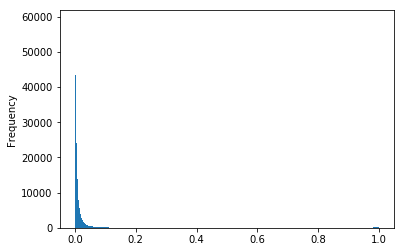

In [17]:
df['model_score'].dropna().plot.hist(bins=1000) # Skewed AF

In [18]:
census_data = df["C1"].fillna(df["C1"].mode()[0])
df['model_score']

0         0.003666
1         0.006602
2         0.006109
3         0.002073
4         0.001811
5         0.004136
6         0.243351
7         0.002124
8         0.007940
9         0.000988
10        0.004871
11        0.006183
12        0.005492
13        0.017076
14        0.000665
15        0.003690
16        0.012482
17        0.007435
18        0.006862
19        0.003235
20        0.000751
21        0.004465
22        0.002639
23        0.004809
24        0.006759
25        0.010958
26        0.001134
27        0.046427
28        0.004518
29        0.014955
            ...   
442816    0.016752
442817    0.182836
442818    0.004617
442819    0.004023
442820    0.003398
442821    0.007509
442822    0.007447
442823    0.018439
442824    0.002565
442825    0.036383
442826    0.001521
442827    0.001170
442828    0.022470
442829    0.003436
442830    0.005478
442831    0.000501
442832    0.756148
442833    0.003192
442834    0.029729
442835    0.002275
442836    0.000893
442837    0.

In [51]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, RandomForestRegressor, AdaBoostRegressor
import copy

In [20]:
def preprocess(df):
    # x is pandas dataframe
    for i in range(1,11):
        # first 10 categorical variables
        k="C"+str(i)
        df[k].fillna(df[k].mode()[0], inplace=True) # fill with mode
        df[k] = df[k] - df[k].min()
    # fill with median in case of continuous
#     imputer = Imputer(missing_values=np.nan, strategy='median', axis=0)
    for i in range(1,41):
        k="V"+str(i)
        df[k] = pd.to_numeric(df[k], errors='coerce')
        df[k].fillna(df[k].median(), inplace=True)
    return df

In [44]:
df = preprocess(df)
y = df['model_score'].values
X = df.drop(columns='model_score').values

sc = StandardScaler()
    
X[:, 10:] = sc.fit_transform(X[:, 10:]) # normalize numeric data

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# Y_train = (Y_train>0.5).astype('int')
# Y_test = (Y_test>0.5).astype('int')
clf = DecisionTreeRegressor() #(class_weight="balanced")
clf.fit(X_train, Y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [45]:
prob = clf.predict(X_test)
pred = (prob > 0.5).astype(np.int32)

# print (prob)

In [46]:
Y_test_new = (Y_test>0.5).astype('int')

print(classification_report(Y_test_new, pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     86474
           1       0.71      0.74      0.72      2096

    accuracy                           0.99     88570
   macro avg       0.85      0.87      0.86     88570
weighted avg       0.99      0.99      0.99     88570



In [47]:
bce_loss = sklearn.metrics.log_loss(Y_test_new, pred)
print (bce_loss)

0.46171862928691987


In [21]:
clf_nobal = DecisionTreeRegressor()
clf_nobal.fit(X_train, Y_train)
pred = clf_nobal.predict(X_test)

NameError: name 'pred' is not defined

In [21]:
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     86474
           1       0.69      0.72      0.71      2096

    accuracy                           0.99     88570
   macro avg       0.84      0.86      0.85     88570
weighted avg       0.99      0.99      0.99     88570



In [50]:
clf_nobal = RandomForestRegressor()
clf_nobal.fit(X_train, Y_train)

prob = clf_nobal.predict(X_test)
pred = (prob > 0.5).astype(np.int32)


print(classification_report(Y_test_new, pred))
bce_loss = sklearn.metrics.log_loss(Y_test_new, pred)
print (bce_loss)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     86474
           1       0.93      0.72      0.81      2096

    accuracy                           0.99     88570
   macro avg       0.96      0.86      0.90     88570
weighted avg       0.99      0.99      0.99     88570

0.2725831664961625


In [52]:
clf_nobal = AdaBoostRegressor()
clf_nobal.fit(X_train, Y_train)

prob = clf_nobal.predict(X_test)
pred = (prob > 0.5).astype(np.int32)


print(classification_report(Y_test_new, pred))
bce_loss = sklearn.metrics.log_loss(Y_test_new, pred)
print (bce_loss)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     86474
           1       0.73      0.40      0.52      2096

    accuracy                           0.98     88570
   macro avg       0.86      0.70      0.76     88570
weighted avg       0.98      0.98      0.98     88570

0.6071708109302497


In [ ]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering().fit(X_train)

In [ ]:
pred = clustering.predict(X_test)
print(classification_report(Y_test, pred))

In [6]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(random_state=0).fit(X_train)
pred = clf.predict(X_test)

In [10]:
print(classification_report(Y_test, (pred+1)//2))

              precision    recall  f1-score   support

           0       0.69      0.02      0.04     86474
           1       0.01      0.61      0.03      2096

    accuracy                           0.04     88570
   macro avg       0.35      0.32      0.04     88570
weighted avg       0.68      0.04      0.04     88570



In [13]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier().fit(X_train, Y_train)
pred = clf.predict(X_test)
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     86474
           1       0.85      0.46      0.59      2096

    accuracy                           0.99     88570
   macro avg       0.92      0.73      0.79     88570
weighted avg       0.98      0.99      0.98     88570



In [18]:
from sklearn.svm import SVC
clf = SVC().fit(X_train, Y_train)
pred = clf.predict(X_test)
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     86474
           1       0.00      0.00      0.00      2096

    accuracy                           0.98     88570
   macro avg       0.49      0.50      0.49     88570
weighted avg       0.95      0.98      0.96     88570



/storage/home/preksha/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2).fit(X_train, Y_train)
pred = gmm.predict(X_test)
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       0.99      0.79      0.88     86474
           1       0.07      0.68      0.13      2096

    accuracy                           0.79     88570
   macro avg       0.53      0.73      0.50     88570
weighted avg       0.97      0.79      0.86     88570



In [17]:
# from sklearn.manifold import TSNE

# X_embedded = TSNE(n_components=2).fit_transform(X_test)
# plt.scatter(X_embedded, c=Y_test)
# plt.show()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/scratch/scratch4/akashkm99/anaconda/envs/attention/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-17-a1a35df6d6a4>", line 3, in <module>
    X_embedded = TSNE(n_components=2).fit_transform(X_test)
  File "/storage/home/preksha/.local/lib/python3.6/site-packages/sklearn/manifold/_t_sne.py", line 886, in fit_transform
    embedding = self._fit(X)
  File "/storage/home/preksha/.local/lib/python3.6/site-packages/sklearn/manifold/_t_sne.py", line 798, in _fit
    skip_num_points=skip_num_points)
  File "/storage/home/preksha/.local/lib/python3.6/site-packages/sklearn/manifold/_t_sne.py", line 852, in _tsne
    **opt_args)
  File "/storage/home/preksha/.local/lib/python3.6/site-packages/sklearn/manifold/_t_sne.py", line 358, in _gradient_descent
    error, grad = objective(p, *args, **kwargs)
  File "/storage/home/preksha/.local/lib/p

KeyboardInterrupt: 